<a href="https://colab.research.google.com/github/svetlanama/goit-np-hw-01/blob/main/NP_HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

from PIL import Image
from skimage import data, img_as_float


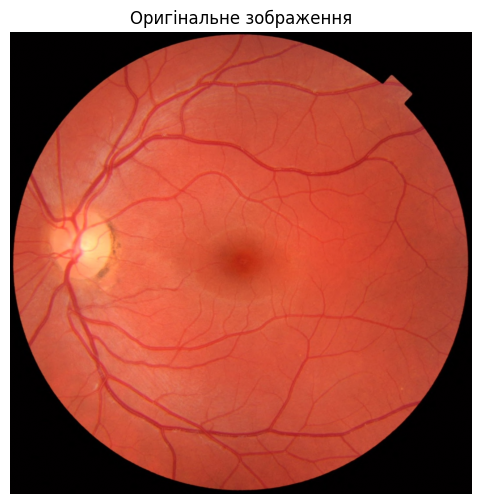

Розмір зображення: (1411, 1411, 3)


In [107]:
# Завантажуємо тестове зображення

image = data.retina()
img = img_as_float(image)
H, W, C = img.shape

# Виводимо зображення
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Оригінальне зображення')
plt.show()

print(f"Розмір зображення: {img.shape}")

Форма 2D матриці: (1411, 4233)


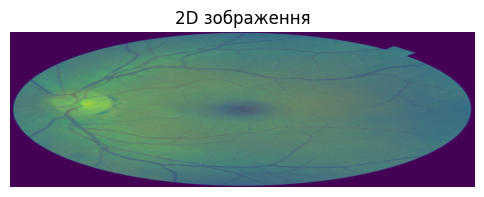

In [108]:
# 2. Перетворення у 2D
flat_image = img.reshape(H, -1)
print(f"Форма 2D матриці: {flat_image.shape}")

# Виводимо зображення
plt.figure(figsize=(6, 6))
plt.imshow(flat_image)
plt.axis('off')
plt.title('2D зображення')
plt.show()

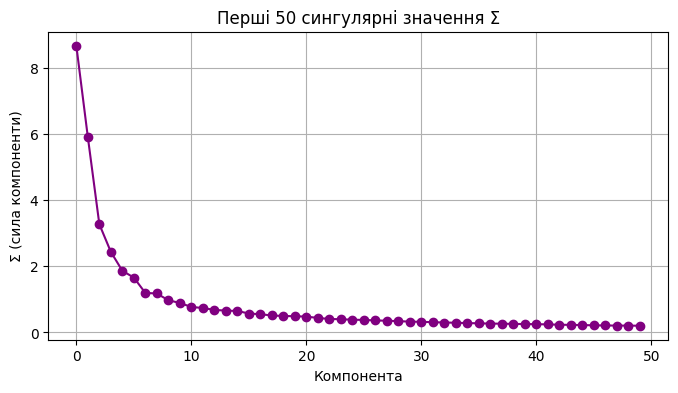

In [109]:
# 3. Візуалізація перших k сингулярних значень Σ
k = 50  # скільки перших значень показати
S = np.sqrt(svd.explained_variance_)  # TruncatedSVD не повертає S напряму, тому беремо з варіації

plt.figure(figsize=(8, 4))
plt.plot(np.arange(k), S[:k], 'o-', color='purple')
plt.title(f'Перші {k} сингулярні значення Σ')
plt.xlabel('Компонента')
plt.ylabel('Σ (сила компоненти)')
plt.grid(True)
plt.show()

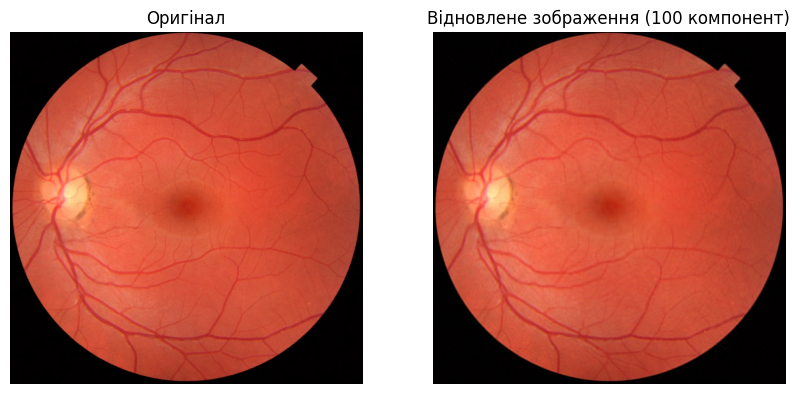

Пояснена варіація після стискання (k=100): 99.64%


In [114]:
# 8. Стиснення зображення з перших 100 компонент
svd = TruncatedSVD(n_components=100)
truncated_image = svd.fit_transform(flat_image)
restored_image = svd.inverse_transform(truncated_image)

# Відновлюємо форму для візуалізації
reconstructed_img = restored_image.reshape(H, W, C)

# Порівняння оригіналу і стислого варіанта
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Оригінал')
ax[0].axis('off')

ax[1].imshow(reconstructed_img)
ax[1].set_title('Відновлене зображення (100 компонент)')
ax[1].axis('off')



plt.show()

# Перевіряємо якість стискання
explained = np.sum(svd.explained_variance_ratio_)
print(f"Пояснена варіація після стискання (k=100): {explained:.2%}")


In [97]:
from sklearn.metrics import mean_squared_error

# 8. Обчислення похибки реконструкції (MSE)
mse = mean_squared_error(flat_image, restored_image)
print(f"Середня квадратична похибка (MSE): {mse:.6f}")


Середня квадратична похибка (MSE): 0.000124
